In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('./../../data/BTC/BTC_Book_0.zip', compression = 'zip', parse_dates = True, index_col = 0)
prices = raw[raw.columns[1::3]]
sizes = raw[raw.columns[2::3]]
trades = raw[raw.columns[3::3]]

guess = pd.read_csv('./../../data/guess.csv', parse_dates = True, index_col = 0)

In [3]:
guess = guess[:50000]

In [4]:
#Original Features
feature_data = pd.DataFrame((prices['Bid_1_Price'] + prices['Ask_1_Price'])/2, columns = ['Mid_Price'])

feature_data['Spread'] = prices['Ask_1_Price'] - prices['Bid_1_Price']
feature_data['Bid_Dist'] = prices['Bid_1_Price'] - prices['Bid_50_Price']
feature_data['Ask_Dist'] = prices['Ask_50_Price'] - prices['Ask_1_Price']

feature_data['Level_1_Size_IMB'] = sizes['Ask_1_Size'] - sizes['Bid_1_Size']
feature_data['Ask_1_Size'] = sizes['Ask_1_Size']
feature_data['Bid_1_Size'] = sizes['Bid_1_Size']

bid_sizes = sizes[sizes.columns[:50]]
feature_data['Cumu_Bids'] = bid_sizes.cumsum(axis=1)['Bid_50_Size']

ask_sizes = sizes[sizes.columns[50:]]
feature_data['Cumu_Asks'] = ask_sizes.cumsum(axis=1)['Ask_50_Size']

feature_data['Cumu_Size_IMB'] = feature_data['Cumu_Asks'] - feature_data['Cumu_Bids']


In [5]:
#New Features
def count_values_in_range(series, range_min, range_max):
    # "between" returns a boolean Series equivalent to left <= series <= right.
    # NA values will be treated as False.
    return series.between(left=range_min, right=range_max).sum()

range_min, range_max = 1.3, 9999

a = 50
#These feature_data represent the cumulative Bid/Ask Size Ratio at different order book depths
feature_data['BA1'] = sizes['Bid_1_Size'] / sizes['Ask_1_Size']
feature_data['BA2'] = (sizes['Bid_1_Size'] + sizes['Bid_2_Size']) / (sizes['Ask_1_Size'] + sizes['Ask_2_Size'])
feature_data['BA4']= sizes.iloc[:,0:4].sum(axis=1)/sizes.iloc[:,50:54].sum(axis=1)
feature_data['BA8'] = sizes.iloc[:,0:8].sum(axis=1)/sizes.iloc[:,50:58].sum(axis=1)
feature_data['BA13'] = sizes.iloc[:,0:13].sum(axis=1)/sizes.iloc[:,50:63].sum(axis=1)
feature_data['BA16'] = sizes.iloc[:,0:16].sum(axis=1)/sizes.iloc[:,50:66].sum(axis=1)
feature_data['BA32'] = sizes.iloc[:,0:32].sum(axis=1)/sizes.iloc[:,50:82].sum(axis=1)
feature_data['BA50'] = sizes.iloc[:,0:50].sum(axis=1)/sizes.iloc[:,50:100].sum(axis=1)

#These feature_data implement cluster detection numerically, not in a boolean fashion
feature_data['BCluster 3:5'] = sizes.iloc[:,2:5].sum(axis=1)/(sizes.iloc[:,0:3].sum(axis=1)+sizes.iloc[:,5:8].sum(axis=1))
feature_data['BCluster 5:7'] = sizes.iloc[:,4:7].sum(axis=1)/(sizes.iloc[:,1:4].sum(axis=1)+sizes.iloc[:,7:10].sum(axis=1))
feature_data['BCluster 7:9'] = sizes.iloc[:,6:9].sum(axis=1)/(sizes.iloc[:,3:6].sum(axis=1)+sizes.iloc[:,9:12].sum(axis=1))
feature_data['BCluster 9:11'] = sizes.iloc[:,8:11].sum(axis=1)/(sizes.iloc[:,5:8].sum(axis=1)+sizes.iloc[:,11:14].sum(axis=1))
feature_data['BCluster 11:13'] = sizes.iloc[:,10:13].sum(axis=1)/(sizes.iloc[:,7:10].sum(axis=1)+sizes.iloc[:,13:16].sum(axis=1))
feature_data['BCluster 13:15'] = sizes.iloc[:,12:15].sum(axis=1)/(sizes.iloc[:,9:12].sum(axis=1)+sizes.iloc[:,15:18].sum(axis=1))
feature_data['BCluster 15:17'] = sizes.iloc[:,14:17].sum(axis=1)/(sizes.iloc[:,11:14].sum(axis=1)+sizes.iloc[:,17:20].sum(axis=1))
feature_data['BCluster 17:19'] = sizes.iloc[:,16:19].sum(axis=1)/(sizes.iloc[:,13:16].sum(axis=1)+sizes.iloc[:,19:22].sum(axis=1))
feature_data['BCluster 19:21'] = sizes.iloc[:,18:21].sum(axis=1)/(sizes.iloc[:,15:18].sum(axis=1)+sizes.iloc[:,21:24].sum(axis=1))
feature_data['BCluster 21:23'] = sizes.iloc[:,20:23].sum(axis=1)/(sizes.iloc[:,17:20].sum(axis=1)+sizes.iloc[:,23:26].sum(axis=1))
feature_data['BCluster 23:25'] = sizes.iloc[:,22:25].sum(axis=1)/(sizes.iloc[:,19:22].sum(axis=1)+sizes.iloc[:,25:28].sum(axis=1))

#These feature_data implement cluster detection numerically, not in a boolean fashion
feature_data['ACluster 3:5'] = sizes.iloc[:,2+a:5+a].sum(axis=1)/(sizes.iloc[:,0+a:3+a].sum(axis=1)+sizes.iloc[:,5+a:8+a].sum(axis=1))
feature_data['ACluster 5:7'] = sizes.iloc[:,4+a:7+a].sum(axis=1)/(sizes.iloc[:,1+a:4+a].sum(axis=1)+sizes.iloc[:,7+a:10+a].sum(axis=1))
feature_data['ACluster 7:9'] = sizes.iloc[:,6+a:9+a].sum(axis=1)/(sizes.iloc[:,3+a:6+a].sum(axis=1)+sizes.iloc[:,9+a:12+a].sum(axis=1))
feature_data['ACluster 9:11'] = sizes.iloc[:,8+a:11+a].sum(axis=1)/(sizes.iloc[:,5+a:8+a].sum(axis=1)+sizes.iloc[:,11+a:14+a].sum(axis=1))
feature_data['ACluster 11:13'] = sizes.iloc[:,10+a:13+a].sum(axis=1)/(sizes.iloc[:,7+a:10+a].sum(axis=1)+sizes.iloc[:,13+a:16+a].sum(axis=1))
feature_data['ACluster 13:15'] = sizes.iloc[:,12+a:15+a].sum(axis=1)/(sizes.iloc[:,9+a:12+a].sum(axis=1)+sizes.iloc[:,15+a:18+a].sum(axis=1))
feature_data['ACluster 15:17'] = sizes.iloc[:,14+a:17+a].sum(axis=1)/(sizes.iloc[:,11+a:14+a].sum(axis=1)+sizes.iloc[:,17+a:20+a].sum(axis=1))
feature_data['ACluster 17:19'] = sizes.iloc[:,16+a:19+a].sum(axis=1)/(sizes.iloc[:,13+a:16+a].sum(axis=1)+sizes.iloc[:,19+a:22+a].sum(axis=1))
feature_data['ACluster 19:21'] = sizes.iloc[:,18+a:21+a].sum(axis=1)/(sizes.iloc[:,15+a:18+a].sum(axis=1)+sizes.iloc[:,21+a:24+a].sum(axis=1))
feature_data['ACluster 21:23'] = sizes.iloc[:,20+a:23+a].sum(axis=1)/(sizes.iloc[:,17+a:20+a].sum(axis=1)+sizes.iloc[:,23+a:26+a].sum(axis=1))
feature_data['ACluster 23:25'] = sizes.iloc[:,22+a:25+a].sum(axis=1)/(sizes.iloc[:,19+a:22+a].sum(axis=1)+sizes.iloc[:,25+a:28+a].sum(axis=1))

# Cluster Boolean feature_data
askClusters = feature_data.iloc[:, 20:31]
bidClusters = feature_data.iloc[:, 9:20]

#these two calls appear to be about 98% of the blocks runtime

feature_data["BClusterCount"] = bidClusters.apply(
    func=lambda row: count_values_in_range(row, range_min, range_max), axis=1)
feature_data["AClusterCount"] = askClusters.apply(
    func=lambda row: count_values_in_range(row, range_min, range_max), axis=1)

# these feature_data detect large orders being cancelled near the best bid/ask which should impact price momentarily

feature_data['BA2Change'] = np.nan
feature_data['LargeBidCancelled'] = np.nan
feature_data['LargeAskCancelled'] = np.nan

feature_data['BA2Change'] = feature_data['BA2'] - feature_data['BA2'].shift(1)

# We can use BA4 change to detect order cancellations at a predefined threshold on the 4 best bids and 4 best asks
def label_cancel(row):
    if row['BA2Change'] < -0.75:
          return 1; # LargeBidCanelled
    elif row['BA2Change'] > 0.75:
          return -1  #LargeAskCancelled
    return 0 # neither

feature_data['LargeOrderCancelled'] = feature_data.apply(lambda row: label_cancel(row), axis=1)
feature_data['LargeBidCancelled'] = (feature_data['LargeOrderCancelled'] == 1)
feature_data['LargeAskCancelled'] = (feature_data['LargeOrderCancelled'] == -1)

feature_data

,Mid_Price,Spread,Bid_Dist,Ask_Dist,Level_1_Size_IMB,Ask_1_Size,Bid_1_Size,Cumu_Bids,Cumu_Asks,Cumu_Size_IMB,...,ACluster 17:19,ACluster 19:21,ACluster 21:23,ACluster 23:25,BClusterCount,AClusterCount,BA2Change,LargeBidCancelled,LargeAskCancelled,LargeOrderCancelled
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-03 17:06:34.424123-04:00,6708.695,0.01,28.69,34.36,0.747936,1.194986,0.447050,101.206556,89.559780,-11.646776,...,0.157558,0.841776,0.463099,0.105869,5,2,NaN,False,False,0
2020-04-03 17:06:35.388369-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.157558,0.841776,0.463099,0.105869,5,1,-0.020924,False,False,0
2020-04-03 17:06:36.414534-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.157558,0.841776,0.463099,0.105869,5,1,0.000000,False,False,0
2020-04-03 17:06:37.400652-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.157558,0.841776,0.463099,0.105869,5,1,0.000000,False,False,0
2020-04-03 17:06:38.408623-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.157558,0.841776,0.463099,0.105869,5,1,0.000000,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-04 07:00:49.900464-04:00,6902.925,0.35,29.60,15.98,3.322936,3.744406,0.421470,89.772613,76.872779,-12.899834,...,1.146703,0.462065,0.048584,0.003419,0,0,0.000000,False,False,0
2020-04-04 07:00:50.890903-04:00,6904.995,0.01,31.84,16.96,-6.580940,0.144911,6.725852,100.381760,44.007290,-56.374470,...,0.173621,4.173948,3.341126,0.028763,6,0,15.451127,False,False,0
2020-04-04 07:00:51.911705-04:00,6904.995,0.01,31.84,16.96,-6.580940,0.144911,6.725852,100.381760,44.007290,-56.374470,...,0.173621,4.173948,3.341126,0.028763,6,0,0.000000,False,False,0


In [6]:
feature_data['Guess'] = guess['Guess'].values

In [7]:
feature_data['return_target'] = feature_data['Mid_Price'].diff(1).shift(-1)
sd = feature_data['return_target'].std()

def return_cat(x, stdev):
    if x > (0 + stdev):
        return 1
    if x < (0 - stdev):
        return -1
    else:
        return 0

feature_data['target_cat'] = feature_data['return_target'].apply(return_cat, args = (sd,))
feature_data = feature_data.dropna()
feature_data

,Mid_Price,Spread,Bid_Dist,Ask_Dist,Level_1_Size_IMB,Ask_1_Size,Bid_1_Size,Cumu_Bids,Cumu_Asks,Cumu_Size_IMB,...,ACluster 23:25,BClusterCount,AClusterCount,BA2Change,LargeBidCancelled,LargeAskCancelled,LargeOrderCancelled,Guess,return_target,target_cat
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-03 17:06:35.388369-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.105869,5,1,-0.020924,False,False,0,0.00000,0.00,0
2020-04-03 17:06:36.414534-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.105869,5,1,0.000000,False,False,0,0.00000,0.00,0
2020-04-03 17:06:37.400652-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.105869,5,1,0.000000,False,False,0,0.00000,0.00,0
2020-04-03 17:06:38.408623-04:00,6708.695,0.01,28.69,34.36,0.778807,1.194986,0.416178,101.175685,89.559780,-11.615905,...,0.105869,5,1,0.000000,False,False,0,0.00000,0.00,0
2020-04-03 17:06:39.418874-04:00,6708.695,0.01,28.69,33.90,0.764714,1.180893,0.416178,101.175685,90.108474,-11.067211,...,0.075998,5,2,0.005556,False,False,0,0.00000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-04 07:00:48.887946-04:00,6902.925,0.35,29.60,15.98,3.322936,3.744406,0.421470,89.772613,76.872779,-12.899834,...,0.003419,0,0,-0.026871,False,False,0,0.00000,0.00,0
2020-04-04 07:00:49.900464-04:00,6902.925,0.35,29.60,15.98,3.322936,3.744406,0.421470,89.772613,76.872779,-12.899834,...,0.003419,0,0,0.000000,False,False,0,0.00000,2.07,1
2020-04-04 07:00:50.890903-04:00,6904.995,0.01,31.84,16.96,-6.580940,0.144911,6.725852,100.381760,44.007290,-56.374470,...,0.028763,6,0,15.451127,False,False,0,1.09714,0.00,0


In [8]:
#transform skewed features
feature_data['Spread'] = np.log(feature_data['Spread'].values)
feature_data['Bid_1_Size'] = np.log(feature_data['Bid_1_Size'].values)
feature_data['Ask_1_Size'] = np.log(feature_data['Ask_1_Size'].values)
feature_data['Bid_Dist'] = np.log(feature_data['Bid_Dist'].values)
feature_data['Ask_Dist'] = np.log(feature_data['Ask_Dist'].values)

C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\domin\Anaconda3\envs\QT\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Text(0.5, 1, 'Correlation Heatmap')

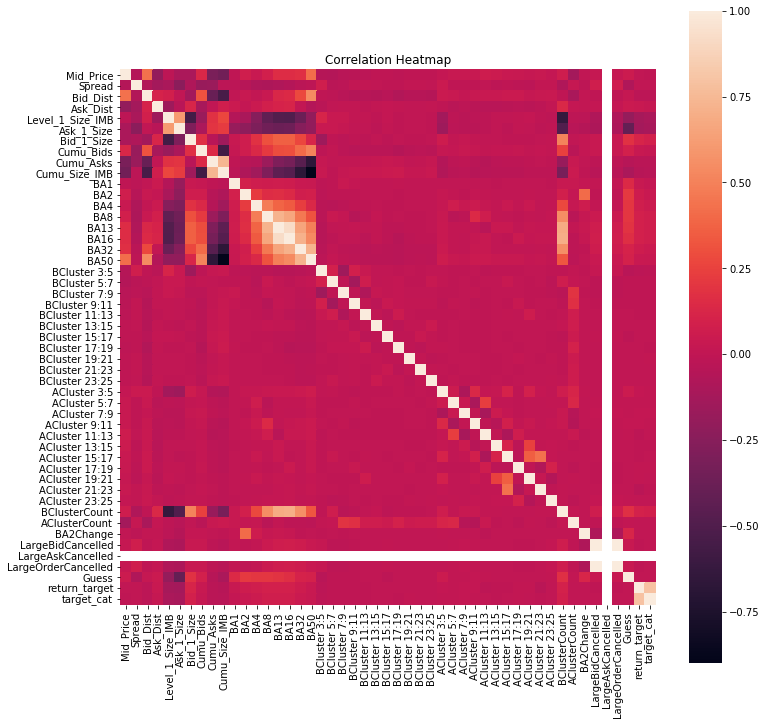

In [9]:
import seaborn as sns
fig, axs = plt.subplots(1, figsize = (12,12))
axs = sns.heatmap(feature_data.corr(), xticklabels=feature_data.columns, yticklabels=feature_data.columns, square=True)
axs.set_title('Correlation Heatmap')

In [10]:
def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


features_to_scale = feature_data.drop(columns = ['return_target', 'target_cat'])

X = rolling_window(features_to_scale.values, 30)
X.shape

(49969, 30, 47)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scale_X = np.zeros(X.shape)

time_scaler = MinMaxScaler(feature_range=(-1,1))
for i in range(scale_X.shape[0]):
    sample = X[i]
    time_scaler.fit(sample)
    sample_tr = time_scaler.transform(sample)
    scale_X[i,:,:] = sample_tr.copy()

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(feature_data['target_cat'].values.reshape(-1,1))

Y = encoder.transform(feature_data['target_cat'].values.reshape(-1,1)).toarray()
Y = Y[29:] #account for time step window

In [24]:
X_train = scale_X[:40000]
Y_train = Y[:40000]

X_test = scale_X[40000:]
Y_test = Y[40000:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 30, 47)
(40000, 3)
(9969, 30, 47)
(9969, 3)


In [33]:
import keras
from keras.callbacks import ModelCheckpoint

model5 = keras.models.Sequential()
model5.add(keras.layers.LSTM(128))
model5.add(keras.layers.Dense(64, activation = 'relu'))
model5.add(keras.layers.Dense(64, activation = 'relu'))
model5.add(keras.layers.Dense(3, activation = 'softmax'))

model5.compile(optimizer = keras.optimizers.Adam(lr = 0.001, decay = 1e-6),
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])

callbacks = [ModelCheckpoint(filepath='best_lstm_model_1.h5', monitor='val_categorical_accuracy', save_best_only=True)]

history = model5.fit(x=X_train,
                    y=Y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data=(X_test, Y_test))

model5.summary()

Train on 40000 samples, validate on 9969 samples
Epoch 1/10
40000/40000 [==============================] - 16s 390us/step - loss: 0.3213 - categorical_accuracy: 0.9206 - val_loss: 0.3392 - val_categorical_accuracy: 0.9022
Epoch 2/10
40000/40000 [==============================] - 15s 371us/step - loss: 0.2737 - categorical_accuracy: 0.9219 - val_loss: 0.3140 - val_categorical_accuracy: 0.9022
Epoch 3/10
40000/40000 [==============================] - 15s 368us/step - loss: 0.2663 - categorical_accuracy: 0.9219 - val_loss: 0.3105 - val_categorical_accuracy: 0.9022
Epoch 4/10
40000/40000 [==============================] - 15s 369us/step - loss: 0.2606 - categorical_accuracy: 0.9219 - val_loss: 0.3126 - val_categorical_accuracy: 0.9022
Epoch 5/10
40000/40000 [==============================] - 16s 404us/step - loss: 0.2555 - categorical_accuracy: 0.9219 - val_loss: 0.3140 - val_categorical_accuracy: 0.9022
Epoch 6/10
40000/40000 [==============================] - 17s 435us/step - loss: 0.250

In [34]:
model_json = model5.to_json()
with open("lstm_model_arch.json", "w") as json_file:
    json_file.write(model_json)

[[1.200e+01 4.570e+02 5.000e+00]
 [2.300e+01 8.913e+03 5.800e+01]
 [5.000e+00 4.730e+02 2.300e+01]]


Text(51.0, 0.5, 'True Label')

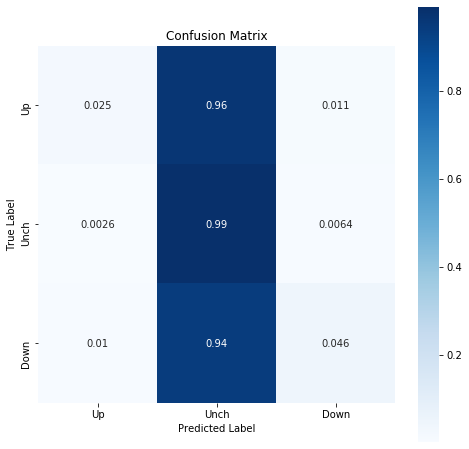

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(Y_test,1), np.argmax(model5.predict(X_test),1))
cm = cm.astype(float)

print(cm)

cm[0,:] = np.true_divide(cm[0,:], cm[0,:].sum())
cm[1,:] = np.true_divide(cm[1,:], cm[1,:].sum())
cm[2,:] = np.true_divide(cm[2,:], cm[2,:].sum())


import seaborn as sns

fig, axs = plt.subplots(1, figsize = (8,8))
axs = sns.heatmap(cm, xticklabels=['Up','Unch', 'Down'], 
                  yticklabels=['Up','Unch', 'Down'], annot = True,square=True, cmap = plt.cm.Blues)
axs.set_title("Confusion Matrix")
axs.set_xlabel('Predicted Label')
axs.set_ylabel('True Label')

In [36]:
from keras.models import model_from_json
# load json and create model
json_file = open('lstm_model_arch.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('best_lstm_model_1.h5')
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001, decay = 1e-6),
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])

Loaded model from disk


[[   0.  474.    0.]
 [   0. 8994.    0.]
 [   0.  501.    0.]]


Text(51.0, 0.5, 'True Label')

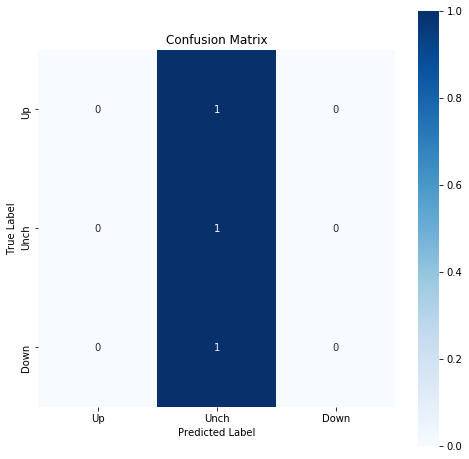

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(Y_test,1), np.argmax(loaded_model.predict(X_test),1))
cm = cm.astype(float)

print(cm)

cm[0,:] = np.true_divide(cm[0,:], cm[0,:].sum())
cm[1,:] = np.true_divide(cm[1,:], cm[1,:].sum())
cm[2,:] = np.true_divide(cm[2,:], cm[2,:].sum())


import seaborn as sns

fig, axs = plt.subplots(1, figsize = (8,8))
axs = sns.heatmap(cm, xticklabels=['Up','Unch', 'Down'], 
                  yticklabels=['Up','Unch', 'Down'], annot = True,square=True, cmap = plt.cm.Blues)
axs.set_title("Confusion Matrix")
axs.set_xlabel('Predicted Label')
axs.set_ylabel('True Label')